In [2]:
from cv2 import VideoCapture
import numpy as np
import cv2

In [2]:
cap = VideoCapture("D:/download/JiJiDown/Download/123.mp4")

In [3]:
su, data = cap.read()

In [6]:
su3, data3 = cap.read()

In [7]:
su4, data4 = cap.read()

In [8]:
su5, data5 = cap.read()

In [4]:
su2, data2 = cap.read()

In [13]:
np.sum(data-data5)

25229421

In [14]:
def precess_image(image):
    '''
    Graying and GaussianBlur
    :param image: The image matrix,np.array
    :return: The processed image matrix,np.array
    '''
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # 灰度化
    gray_image = cv2.GaussianBlur(gray_image, (3, 3), 0)  # 高斯滤波
    return gray_image

In [17]:
gray_pre_image = precess_image(data)
gray_pre_image.shape

(720, 1280)

In [19]:
import torch

In [20]:
a = torch.Tensor([1,2,3])

In [21]:
c = [torch.Tensor([1,2,3]) for i in range(4)]

In [31]:
np.array(c[0])

array([1., 2., 3.], dtype=float32)

In [28]:
np.array([])

False

In [29]:
not None

True

## 测试dataloader

In [3]:
import numpy as np
import torch
from torch.utils.data import TensorDataset, Dataset, DataLoader

In [13]:
x1_n = np.random.rand(3, 25, 24)
x2_n = np.random.rand(3, 70, 65)
x3_n = np.random.rand(3, 43, 50)

(15450,)

In [9]:
x1 = torch.tensor(np.random.rand(3, 25, 24))
x2 = torch.tensor(np.random.rand(3, 70, 65))
x3 = torch.tensor(np.random.rand(3, 43, 50))

In [10]:
xs = [x1, x2, x3]

In [11]:
torch.stack(xs)

RuntimeError: stack expects each tensor to be equal size, but got [3, 25, 24] at entry 0 and [3, 70, 65] at entry 1

ValueError: only one element tensors can be converted to Python scalars

## 缩放图片

In [4]:
from PIL import Image
import torchvision.transforms as transforms

In [5]:
image = Image.open("D:/other/work/档案系统/代码/gitlab/0718/danganxitong-ml/api_test_code-V1/data/Casia_FaceV5/100/100_0.bmp")

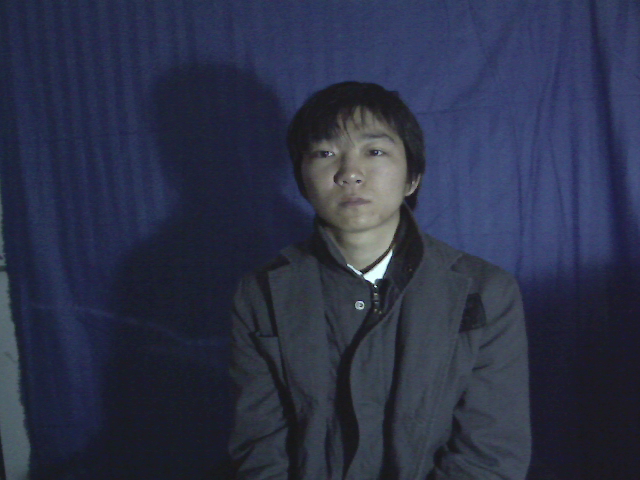

In [8]:
image

In [6]:
size = 2000
transform1 = transforms.Compose([
        transforms.Scale(size),
        transforms.CenterCrop((size, size)),
        transforms.ToTensor()
    ])

C:\Users\asus\Anaconda_3\lib\site-packages\torchvision\transforms\transforms.py:210: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [41]:
def image_np_to_tensor(img):
    tensor = torch.from_numpy(img.transpose((2,0,1)))
    tensor = tensor.float().div(255)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return tensor
def image_tensor_to_np(tensor):
    img = tensor.mul(255).byte()
    img = img.cpu().numpy().transpose((1, 2, 0))
    return img

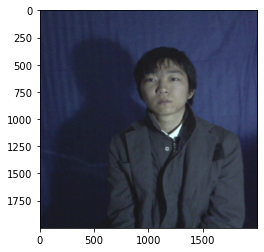

In [42]:
tensor_0n = image_np_to_tensor(im_0n)
im_1n = image_tensor_to_np(tensor_0n)
plt.imshow(im_1n)

In [34]:
im_1n.shape

(2000, 2000, 3)

In [35]:
im_0n.shape

(2000, 2000, 3)

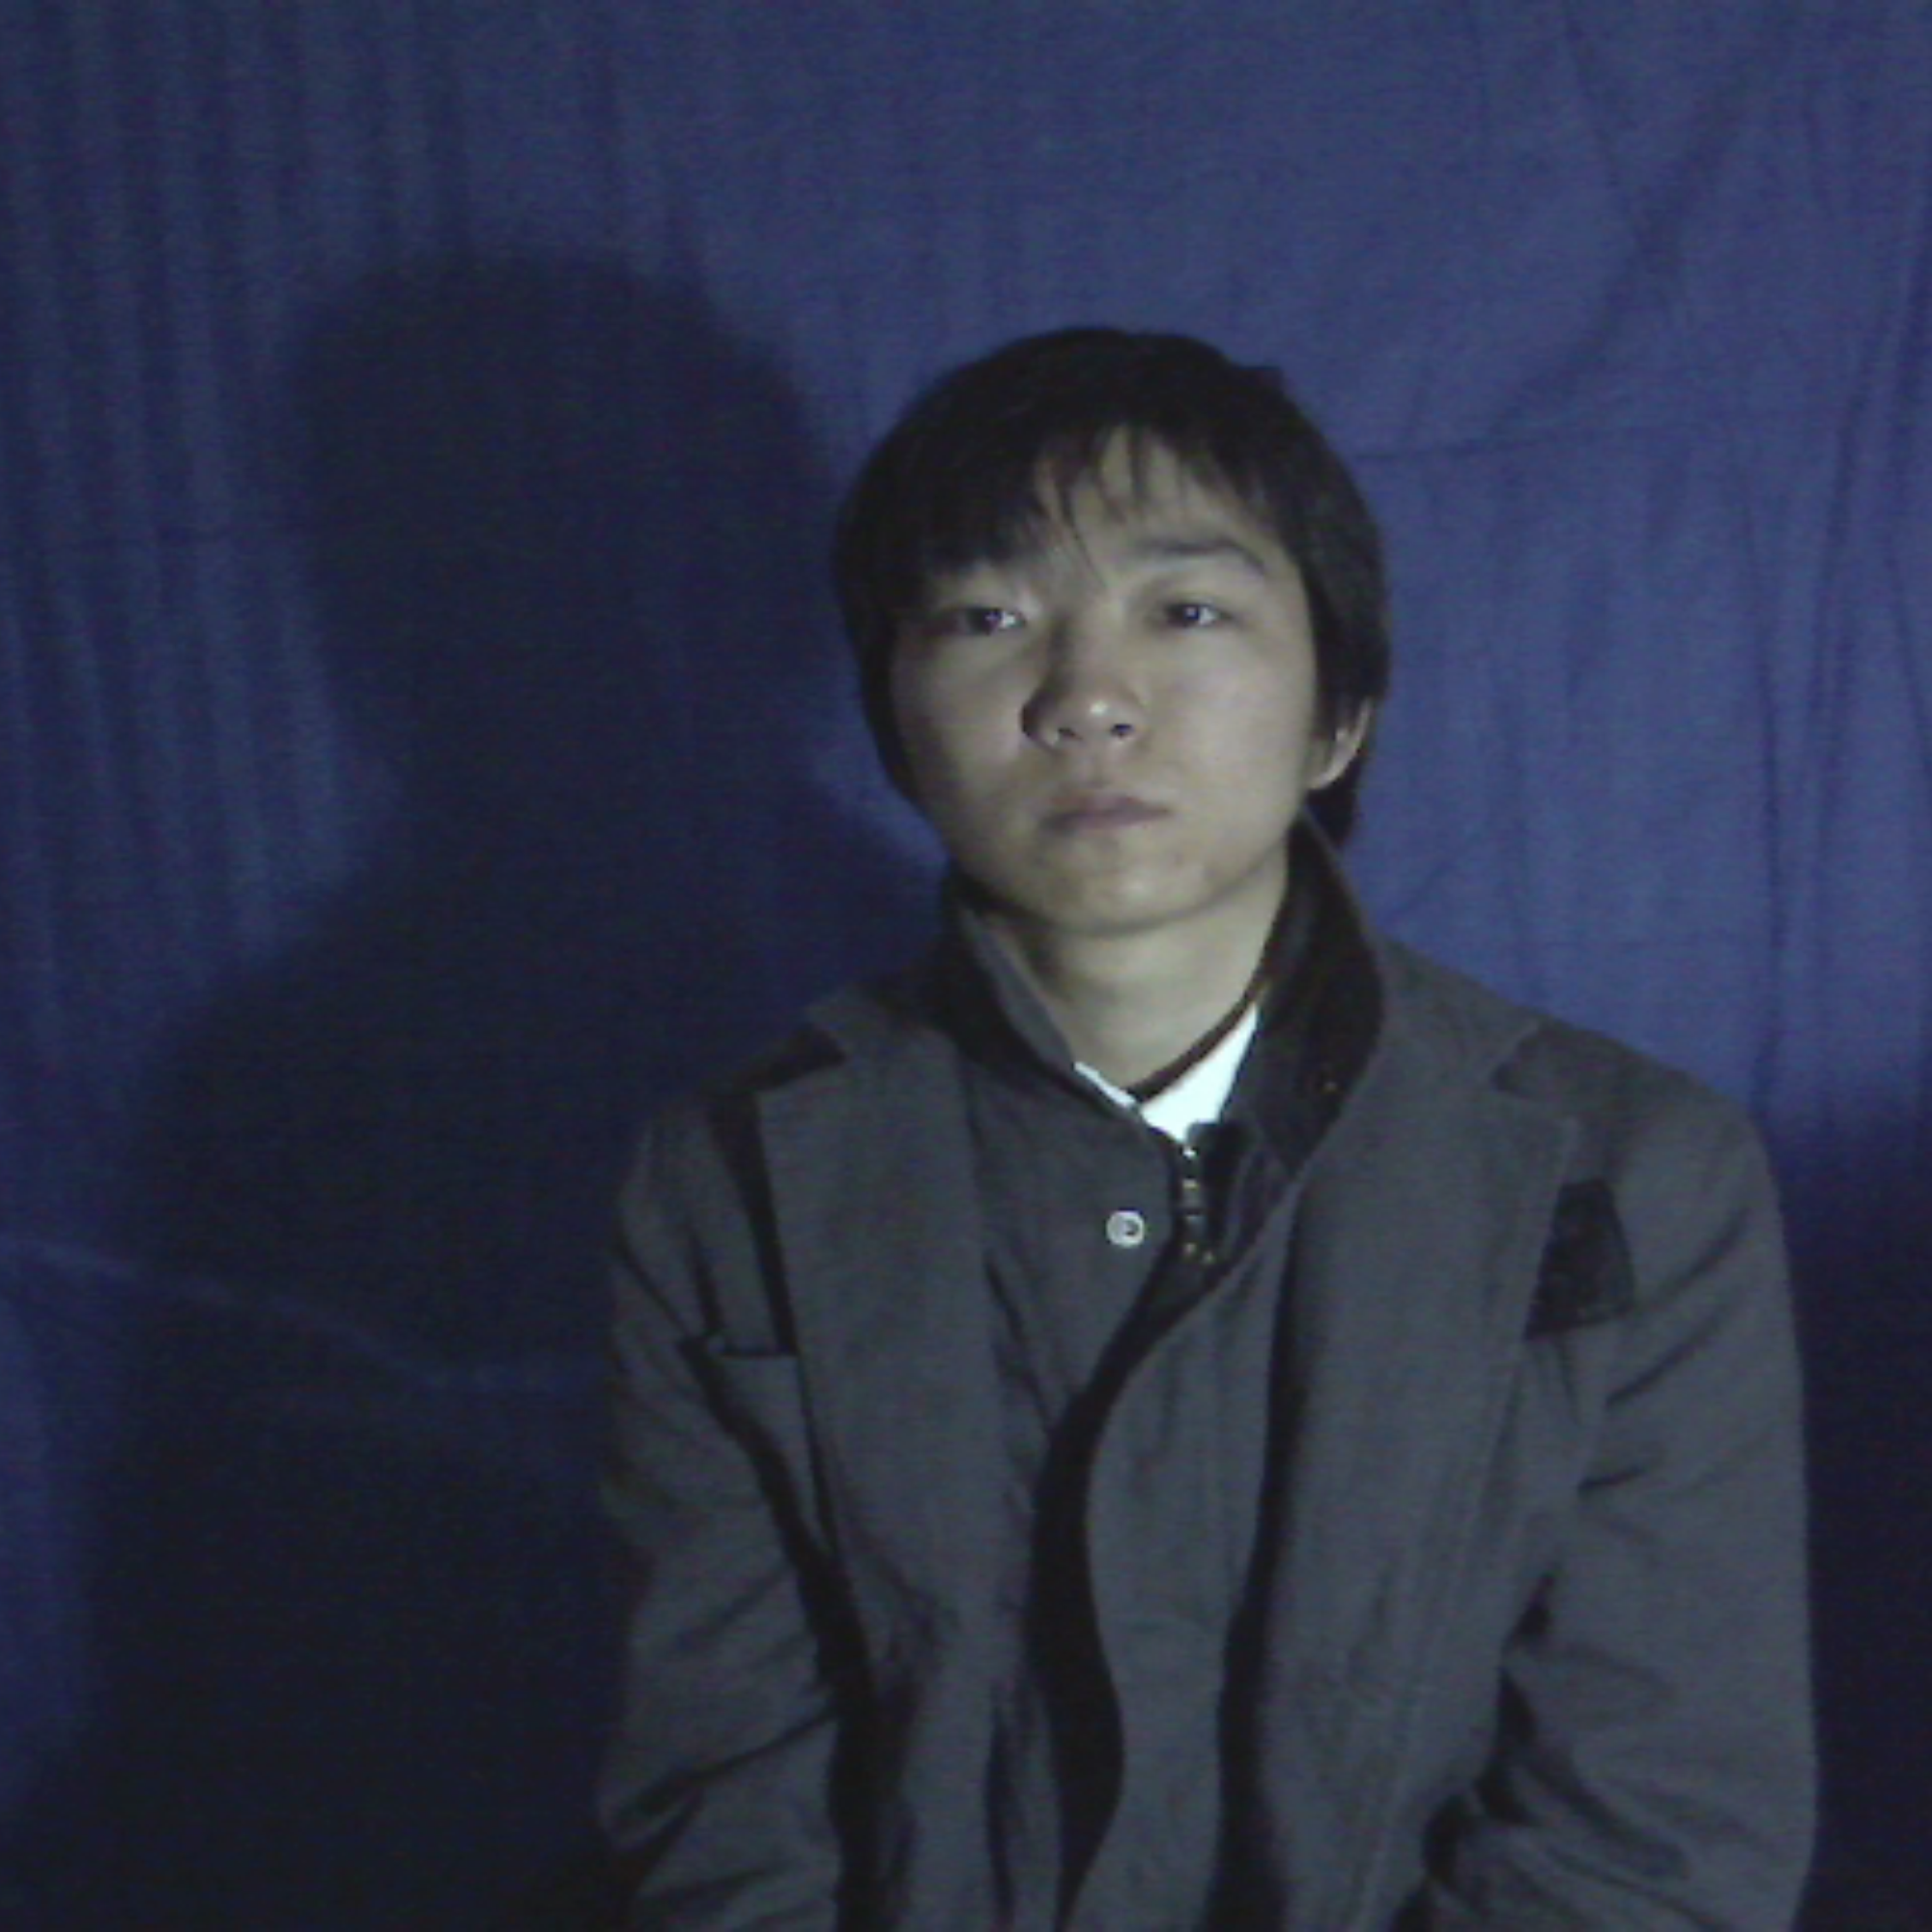

In [50]:
toPIL = transforms.ToPILImage()
toPIL(img_0)

In [13]:
im_0n = tensor_to_np(img_0)

In [14]:
im_0n.shape

(2000, 2000, 3)

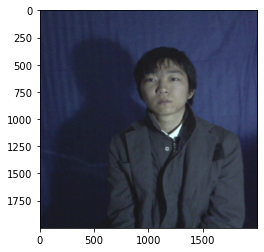

In [15]:
import matplotlib.pyplot as plt
plt.imshow(im_0n)

In [12]:
def image_tensor_to_np(tensor):
    img = tensor.mul(255).byte()
    img = img.cpu().numpy().transpose((1, 2, 0))
    return img

In [17]:
import base64
def np_to_base64(img_np):
    retval, buffer = cv2.imencode('.jpg', img_np)
    img_base64 = base64.b64encode(buffer)
    img_base64 = img_base64.decode()
    return img_base64
np_to_base64(im_0n)

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAfQB9ADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD82Xcv2pHl+TGKVGCjFDx7xnP618y3ZH37dhrSjaP8ajlfcvSl2fMVz0prAAfMKydJvqYtFCeDdIWzUBURSbs5qa9fDHbkVSlDsCQxrpoxcGCqJMt/bgvyYqa2vQ3yY61mKrAc5qaByuOD+VaSqdC41LvY2Ivl96sQ/vJlY8Y

In [41]:
np.array(image).shape

(480, 640, 3)

In [7]:
img_0 = transform1(image)

In [8]:
img_0.shape

torch.Size([3, 2000, 2000])

In [ ]:
img_1 = np.array(img_0.p)

In [38]:
import matplotlib.pyplot as plt
Image.fromarray(np.array(img_0))

TypeError: Cannot handle this data type: (1, 1, 320), <f4

In [20]:
a = np.random.rand(1, 512)
b = np.random.rand(7,512)

In [24]:
np.append(a,b[[0]], axis=0).shape

(2, 512)

In [ ]:
np.append()